# Pyomo Optimization Tutorial Notebook


* This notebook provides an overview of optimization concepts and demonstrates

* How to use Pyomo to solve various types of optimization problems.

## Table of Contents:

### 1. Introduction to Optimization

### 2. Types of Mathematical Problems
   2.1 Linear Programming (LP)

   2.2 Nonlinear Programming (NLP)

   2.3 Mixed-Integer Linear Programming (MILP)

   2.4 Mixed-Integer Nonlinear Programming (MINLP)
   
   2.5 Stochastic Programming

### 3. Types of Optimization Models
   3.1 Concrete Models

   3.2 Abstract Models

### 4. Steps of Optimization

   4.1 Understanding the Problem

   4.2 Modeling

   4.3 Framework Selection

   4.4 Choosing a Solver

### 5. Examples

   5.1 Linear Programming Example

   5.2 Nonlinear Programming Example

   5.3 Mixed-Integer Linear Programming Example
   
   5.4 Mixed-Integer Nonlinear Programming Example


### 1. Introduction to Optimization

 Optimization is the process of finding the best solution to a problem from a set of feasible solutions. The goal is to maximize or minimize an objective function, which represents a measure of performance, subject to constraints that represent the limits or requirements of the problem.
 
 In mathematical terms, optimization problems can be formulated as follows:
 
 
 \begin{align*}
\text{Minimize or Maximize:} & \quad f(x) \\[10pt]
\text{Subject to:} & \quad g(x) \leq b
\end{align*}

 Where:
 - f(x) is the objective function, representing the performance metric to optimize.
 - g(x) represents constraints, defining the feasible region of the problem.
 - x represents the decision variables, which can be continuous, integer, or binary.

 Optimization problems can vary widely in complexity and type, depending on the nature of the objective function and constraints.

### 2. Types of Mathematical Problems

 Pyomo is a versatile library for modeling optimization problems, supporting various problem types. Here are some common types of optimization problems:

#### 2.1 Linear Programming (LP)

 Linear Programming (LP) involves optimizing a linear objective function subject to linear constraints. LP problems are typically used in resource allocation, production planning, and transportation.

 **General Form of LP Problem:**


\begin{align*}
\text{Minimize or Maximize:} & \quad c^T \cdot x \\[10pt]
\text{Subject to:} & \quad A \cdot x \leq b, \\[10pt]
                    & \quad x \geq 0
\end{align*}


#### 2.2 Nonlinear Programming (NLP)

 Nonlinear Programming (NLP) involves optimizing a nonlinear objective function subject to nonlinear constraints. NLP problems are encountered in fields like engineering design, economics, and machine learning.

 **General Form of NLP Problem:**
 
\begin{align*}
\text{Minimize or Maximize:} & \quad f(x) \\[10pt]
\text{Subject to:} & \quad g(x) \leq b, \\[10pt]
                   & \quad h(x) = 0
\end{align*}

#### 2.3 Mixed-Integer Linear Programming (MILP)

 Mixed-Integer Linear Programming (MILP) involves optimizing a linear objective function subject to linear constraints, with some decision variables restricted to integer values. This is useful for problems with discrete decisions, such as scheduling and network design.

 **General Form of MILP Problem:**
 
 \begin{align*}
\text{Minimize or Maximize:} & \quad c^T \cdot x \\[10pt]
\text{Subject to:} & \quad A \cdot x \leq b, \\[10pt]
                   & \quad x_i \in \mathbb{Z}
\end{align*}


#### 2.4 Mixed-Integer Nonlinear Programming (MINLP)

 Mixed-Integer Nonlinear Programming (MINLP) involves optimizing a nonlinear objective function subject to nonlinear constraints, with some decision variables restricted to integer values MINLP problems are often encountered in complex engineering applications.

 **General Form of MINLP Problem:**
 
\begin{align*}
\text{Minimize or Maximize:} & \quad f(x) \\[10pt]
\text{Subject to:} & \quad g(x) \leq b, \\[10pt]
                   & \quad h(x) = 0, \\[10pt]
                   & \quad x_i \in \mathbb{Z}
\end{align*}

 #### 2.5 Stochastic Programming

 Stochastic Programming addresses optimization problems with uncertainty in parameters. The goal is to find robust solutions that perform well under various scenarios of uncertain data. This is useful for supply chain management, finance, and risk analysis.


### 3. Types of Optimization Models

Pyomo supports two main types of models: Concrete and Abstract.

#### 3.1 Concrete Models

 - Concrete models are fully specified at the time of creation with all data and parameters.
 - They are typically used when the problem data is fixed and known in advance.

#### 3.2 Abstract Models

 - Abstract models define the structure of the optimization problem without specific data.
 - They allow flexibility and can be reused with different datasets, making them ideal for scenarios where data changes.


### 4. Steps of Optimization

 The optimization process involves several steps:

#### 4.1 Understanding the Problem

 - Clearly define the problem, including the objective function, constraints, and decision variables.
 - Identify any special requirements or conditions.

#### 4.2 Modeling

 - Create a mathematical representation of the problem using Pyomo.
 - Define the objective function, constraints, and decision variables.

#### 4.3 Framework Selection

 - Choose the appropriate modeling framework and tools based on the problem type and complexity.
 - Pyomo provides capabilities for handling various types of optimization problems.

#### 4.4 Choosing a Solver

 - Select a suitable solver to solve the optimization problem.
 - Pyomo supports multiple solvers (e.g., GLPK, CPLEX, IPOPT) for different problem types.



### 5. Examples

* Let's explore specific examples for each type of mathematical problem using Pyomo.


#### 5.1 Linear Programming Example

 Consider a simple LP problem:

 \begin{align*}
\text{Maximize:} & \quad z = 3x_1 + 5x_2 \\[10pt]
\text{Subject to:} & \quad 2x_1 + 3x_2 \leq 12 \\[10pt]
                   & \quad -x_1 + x_2 \leq 3 \\[10pt]
                   & \quad x_1, x_2 \geq 0
\end{align*}


Optimal Solution: x1 = 0.6, x2 = 3.6
Objective Value: 19.8


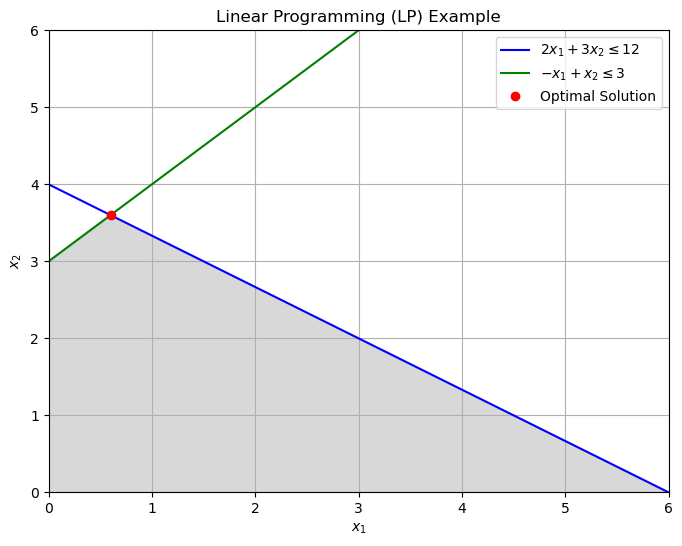

In [1]:
# Linear Programming (LP) Example

import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# Create a concrete model
model = pyo.ConcreteModel()

# Define decision variables
model.x1 = pyo.Var(domain=pyo.NonNegativeReals)
model.x2 = pyo.Var(domain=pyo.NonNegativeReals)

# Define the objective function
model.obj = pyo.Objective(expr=3 * model.x1 + 5 * model.x2, sense=pyo.maximize)

# Define constraints
model.con1 = pyo.Constraint(expr=2 * model.x1 + 3 * model.x2 <= 12)
model.con2 = pyo.Constraint(expr=-model.x1 + model.x2 <= 3)

# Solve the model using GLPK
solver = pyo.SolverFactory('glpk')
solver.solve(model)

# The other solvents that we can use for solving.

# CBC solver instead
# solver = pyo.SolverFactory('cbc')

# CPLEX solver (requires CPLEX installation)
# solver = pyo.SolverFactory('cplex')

# Gurobi solver (requires Gurobi installation)
# solver = pyo.SolverFactory('gurobi')

# Display the results
x1_value = model.x1()
x2_value = model.x2()
objective_value = model.obj()

print(f"Optimal Solution: x1 = {x1_value}, x2 = {x2_value}")
print(f"Objective Value: {objective_value}")

# Plot the feasible region
x = np.linspace(0, 10, 200)
y1 = (12 - 2*x) / 3
y2 = x + 3
y3 = np.minimum(y1, y2)

plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$2x_1 + 3x_2 \leq 12$', color='blue')
plt.plot(x, y2, label=r'$-x_1 + x_2 \leq 3$', color='green')
plt.fill_between(x, 0, y3, where=(y3 >= 0), color='gray', alpha=0.3)
plt.plot(x1_value, x2_value, 'ro', label='Optimal Solution')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Linear Programming (LP) Example')
plt.legend()
plt.grid(True)
plt.show()


### 5.2 Nonlinear Programming Example

 Consider a simple NLP problem:


\begin{align*}
\text{Minimize:} & \quad f(x) = (x_1 - 2)^2 + (x_2 - 3)^2 \\[10pt]
\text{Subject to:} & \quad x_1^2 + x_2^2 \leq 5 \\[10pt]
                   & \quad x_1, x_2 \geq 0
\end{align*}

Optimal Solution: x1 = 1.240347351826904, x2 = 1.86052102721809
Objective Value: 1.8754844752885143


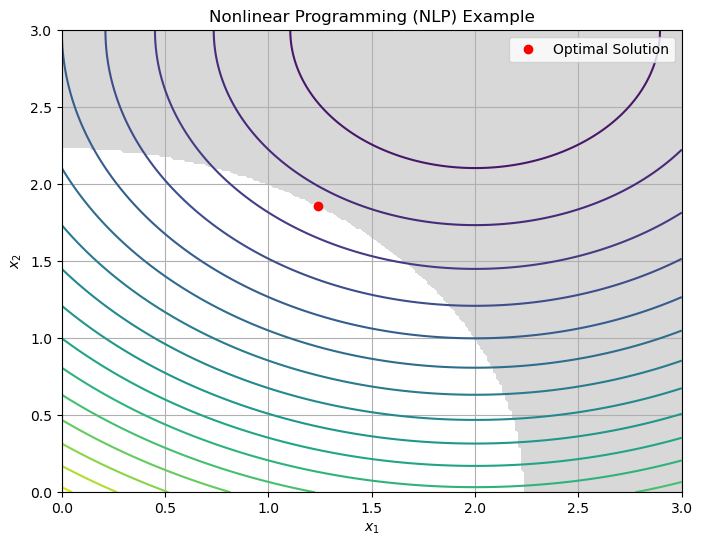

In [2]:
# Nonlinear Programming (NLP) Example

import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# Create a concrete model
model = pyo.ConcreteModel()

# Define decision variables
model.x1 = pyo.Var(domain=pyo.NonNegativeReals)
model.x2 = pyo.Var(domain=pyo.NonNegativeReals)

# Define the objective function
model.obj = pyo.Objective(expr=(model.x1 - 2) ** 2 + (model.x2 - 3) ** 2, sense=pyo.minimize)

# Define constraints
model.con1 = pyo.Constraint(expr=model.x1 ** 2 + model.x2 ** 2 <= 5)

# Solve the model using IPOPT
solver = pyo.SolverFactory('ipopt')
# solver = pyo.SolverFactory('knitro')
solver.solve(model)

#  KNITRO solver (requires KNITRO installation)
# solver = pyo.SolverFactory('knitro')

# Uncomment the line below to use SNOPT solver (requires SNOPT installation)
# solver = pyo.SolverFactory('snopt')

# Display the results
x1_value = model.x1()
x2_value = model.x2()
objective_value = model.obj()

print(f"Optimal Solution: x1 = {x1_value}, x2 = {x2_value}")
print(f"Objective Value: {objective_value}")

# Plot the feasible region and contours
x = np.linspace(0, 3, 200)
y = np.linspace(0, 3, 200)
X, Y = np.meshgrid(x, y)
Z = (X - 2) ** 2 + (Y - 3) ** 2

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.contourf(X, Y, (X ** 2 + Y ** 2 <= 5).astype(int), levels=[0, 0.5], colors='gray', alpha=0.3)
plt.plot(x1_value, x2_value, 'ro', label='Optimal Solution')
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Nonlinear Programming (NLP) Example')
plt.legend()
plt.grid(True)
plt.show()


### 5.3 Mixed-Integer Linear Programming Example

 Consider a simple MILP problem:

\begin{align*}
\max & \quad z = 2x_1 + 3x_2 \\[10pt]
\text{s.t.} & \quad 4x_1 + 5x_2 \leq 9 \\[10pt]
                   & \quad x_1, x_2 \in \{0, 1\}
\end{align*}

Optimal Solution: x1 = 1.0, x2 = 1.0
Objective Value: 5.0


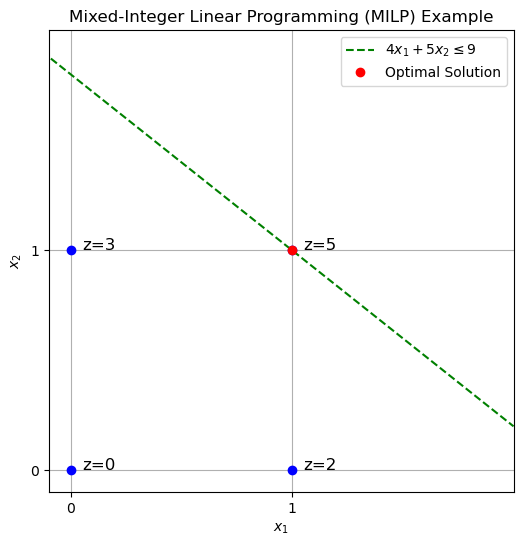

In [10]:
# Mixed-Integer Linear Programming (MILP) Example

import pyomo.environ as pyo
import matplotlib.pyplot as plt

# Create a concrete model
model = pyo.ConcreteModel()

# Define decision variables
model.x1 = pyo.Var(domain=pyo.Binary)
model.x2 = pyo.Var(domain=pyo.Binary)

# Define the objective function
model.obj = pyo.Objective(expr=2 * model.x1 + 3 * model.x2, sense=pyo.maximize)

# Define constraints
model.con1 = pyo.Constraint(expr=4 * model.x1 + 5 * model.x2 <= 9)

# Solve the model using GLPK
solver = pyo.SolverFactory('glpk')
solver.solve(model)

# The other solvents that we can use for solving.

# CBC solver instead
# solver = pyo.SolverFactory('cbc')

# CPLEX solver (requires CPLEX installation)
# solver = pyo.SolverFactory('cplex')

# To use Gurobi solver (requires Gurobi installation)
# solver = pyo.SolverFactory('gurobi')

# Display the results
x1_value = model.x1()
x2_value = model.x2()
objective_value = model.obj()

print(f"Optimal Solution: x1 = {x1_value}, x2 = {x2_value}")
print(f"Objective Value: {objective_value}")

# Plot the feasible points
feasible_points = [(x1, x2) for x1 in [0, 1] for x2 in [0, 1] if 4 * x1 + 5 * x2 <= 9]

plt.figure(figsize=(6, 6))
for (x1, x2) in feasible_points:
    plt.plot(x1, x2, 'bo')
    plt.text(x1 + 0.05, x2, f'z={2*x1 + 3*x2}', fontsize=12)

# Define the constraint line
x_line = np.linspace(-0.5, 2, 200)
y_line = (9 - 4 * x_line) / 5

# Plot the constraint line
plt.plot(x_line, y_line, 'g--', label=r'$4x_1 + 5x_2 \leq 9$')

plt.plot(x1_value, x2_value, 'ro', label='Optimal Solution')
plt.xlim(-0.1, 2)
plt.ylim(-0.1, 2)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Mixed-Integer Linear Programming (MILP) Example')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)
plt.legend()
plt.show()


### 5.4 Mixed-Integer Nonlinear Programming Example

 Consider a simple MINLP problem:

\begin{align*}
\text{Minimize:} & \quad f(x) = x_1^2 + x_2^2 \\[10pt]
\text{Subject to:} & \quad x_1 + 2x_2 \geq 3 \\[10pt]
                   & \quad x_1 \in \{0, 1\} \\[10pt]
                   & \quad x_2 \in [0, 2]
\end{align*}

Optimal Solution: x1 = 1.0, x2 = 1.0
Objective Value: 2.0


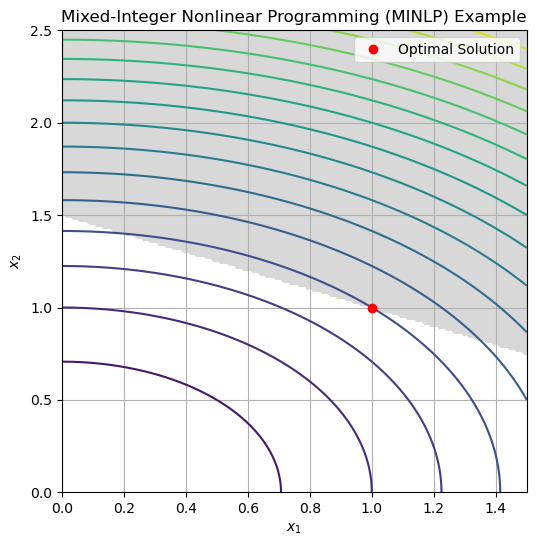

In [12]:
# Mixed-Integer Nonlinear Programming (MINLP) Example

import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt
# import gurobipy

# Create a concrete model
model = pyo.ConcreteModel()

# Define decision variables
model.x1 = pyo.Var(domain=pyo.Binary)
model.x2 = pyo.Var(domain=pyo.NonNegativeReals, bounds=(0, 2))

# Define the objective function
model.obj = pyo.Objective(expr=model.x1 ** 2 + model.x2 ** 2, sense=pyo.minimize)

# Define constraints
model.con1 = pyo.Constraint(expr=model.x1 + 2 * model.x2 >= 3)

# Solve the model using gurobi
solver = pyo.SolverFactory('gurobi', solver_io='python')
solver.solve(model)

# The other solvents that we can use for solving.

# Couenne solver (requires Couenne installation)
# solver = pyo.SolverFactory('couenne')

# BARON solver (requires BARON installation)
# solver = pyo.SolverFactory('baron')

# Display the results
x1_value = model.x1()
x2_value = model.x2()
objective_value = model.obj()

print(f"Optimal Solution: x1 = {x1_value}, x2 = {x2_value}")
print(f"Objective Value: {objective_value}")

# Plot the feasible region and contours
x = np.linspace(0, 1.5, 200)
y = np.linspace(0, 2.5, 200)
X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

plt.figure(figsize=(6, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.contourf(X, Y, (X + 2 * Y >= 3).astype(int), levels=[0.5, 1], colors='gray', alpha=0.3)
plt.plot(x1_value, x2_value, 'ro', label='Optimal Solution')
plt.xlim(0, 1.5)
plt.ylim(0, 2.5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Mixed-Integer Nonlinear Programming (MINLP) Example')
plt.legend()
plt.grid(True)
plt.show()
